In [29]:
#Name: Vedant Paresh Shah
#NET ID: VXS200021
#Course: AI CS6364.002

# Question 3:

In [30]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [31]:
class Model(nn.Module):
    def __init__(self, data_nums, width, height, k_type):
        kernel = None
        if k_type == 'vertical':
            kernel = torch.Tensor([[1, 0, -1], [-1, 0, 1], [1, 0, -1]])
        if k_type == 'horizontal':
            kernel = torch.Tensor([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

        super(Model, self).__init__()
        self.convoluted = nn.Conv2d(data_nums, data_nums, kernel_size=(3, 3), padding=1, stride=1, bias=False)
        self.convoluted.weight.data[:, :, ] = kernel
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=(3, 3), stride=1, padding=1)
        self.vectorizer = nn.Flatten()
        self.fullyconnected = nn.Linear(width * height * data_nums, 100)

    def forward(self, x):
        x = x.reshape(1, 1, *x.shape)
        altered_images = []
        y = x
        y = self.convoluted(y)
        altered_images.append(y[0][0])
        y = self.relu(y)
        altered_images.append(y[0][0])
        y = self.maxpool(y)
        altered_images.append(y[0][0])

        return self.fullyconnected(self.vectorizer(y)), altered_images

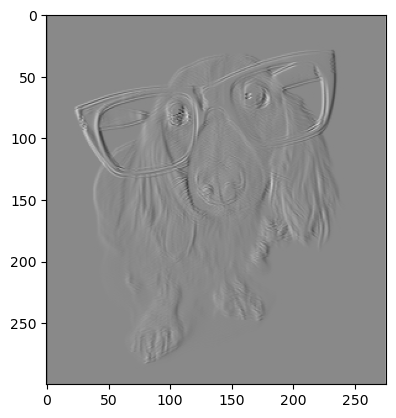

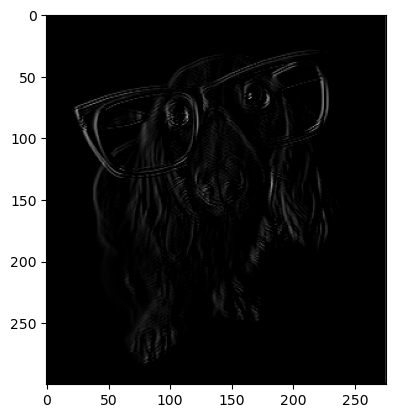

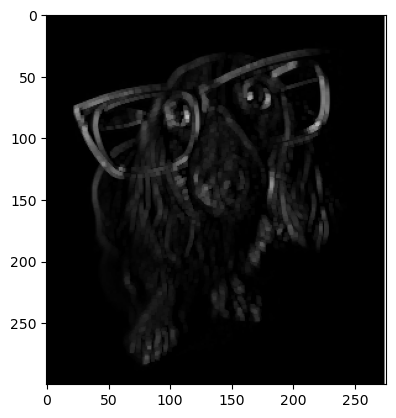

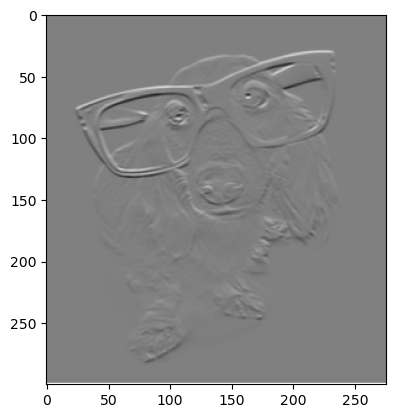

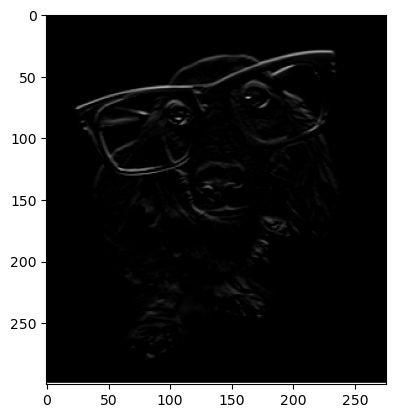

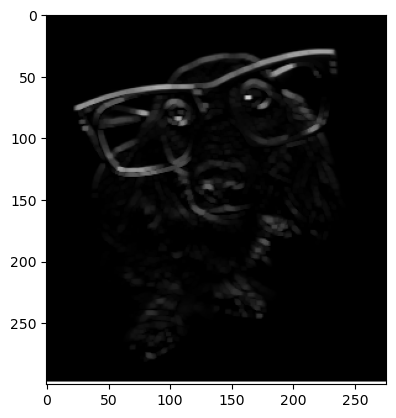

In [32]:
img = cv2.imread('HW3-Q3-image.jpeg', cv2.IMREAD_GRAYSCALE)
img = torch.Tensor(img)
VerticalModel = Model(1, img.shape[0], img.shape[1], 'vertical')
_, images = vert_model(img)
for image in images:
    image = image.detach().numpy()
    imshow(image, cmap='gray')
    plt.show()
HorizontalModel = Model(1, img.shape[0], img.shape[1], 'horizontal')
_, images = hori_model(img)
for image in images:
    image = image.detach().numpy()
    imshow(image, cmap='gray')
    plt.show()